In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

#Equation for gradient descent b = a - g*D(F(a)), where a is a point and g is step size.
#define f

def f(w1, w2): 
    return (w1**2 + w2 - 11)**2 + (w1 + w2**2 - 7)**2

#define function that calculates gradient numerically using a step size and a point
def D(a1, a2, step):
    Dw1 = (f(a1 + step, a2) - f(a1, a2))/step
    Dw2 = (f(a1, a2+step) - f(a1,a2))/step
    return [Dw1, Dw2]

In [3]:
#Gradient Descent function
def Grad(w0, step): 
    b = np.linalg.norm(D(w0[0], w0[1], step))
    Gradient = D(w0[0], w0[1], step)
    iteration = 0
    iterations0 = []
    iterations1 = []
    while (b > 10**-12):
        b = np.linalg.norm(D(w0[0], w0[1], step))
        Gradient = D(w0[0], w0[1], step)
        w0[0] = w0[0] - step*Gradient[0]
        w0[1] = w0[1] - step*Gradient[1]
        iterations0.append(w0[0])
        iterations1.append(w0[1])
        #store each iteration in a list
        iteration = iteration + 1
    print("Minimum found at ", w0, " in ", iteration, " iterations")
    iterations = np.vstack((iterations0, iterations1))
    return iterations

#Step size 0.005
#initialize variables
#Declare w0
w0 = [0, -4]
step = 0.005

Grad(w0, step);


Minimum found at  [-3.78267871631165, -3.286763442941464]  in  94  iterations


In [4]:
#Step size 0.01
#Declare w0
w0 = [0, -4]
step = 0.01

Grad(w0, step);

Minimum found at  [-3.786044947731016, -3.2903381277747132]  in  39  iterations


In [5]:
#For this particular problem, the speed of gradient descent is inversely proportional to the step size. 
#That is, a smaller step size means it will take more iterations to find a minimum. However, one should take into account
#the possibility of stepping over the minimum if the step size is too large.

In [6]:
#Step size = 0.01
step = 0.01
print("w0 = [0, -4]T")
w0 = [0, -4]
#i
w1 = Grad([0, -4], step);

#ii
print("w0 = [0.5, -4]T")
w2 = Grad([0.5, -4], step);

#iii
print("w0 = [0, 4]T")
w3 = Grad([0, 4], step);

#iv
print("w0 = [0.5, 4]T")
w4 = Grad([0.5, 4], step);



w0 = [0, -4]T
Minimum found at  [-3.786044947731016, -3.2903381277747132]  in  39  iterations
w0 = [0.5, -4]T
Minimum found at  [3.579681097810946, -1.851995733520539]  in  92  iterations
w0 = [0, 4]T
Minimum found at  [-2.8100155389714128, 3.126387482995013]  in  43  iterations
w0 = [0.5, 4]T
Minimum found at  [2.995659761564194, 1.9975428157983641]  in  111  iterations


In [7]:
#Not all of the solutions are the same. I will compare their values by plugging them into f to determine 
#if they are global or local mins
print(f(w1[0][-1], w1[1][-1]))
print(f(w2[0][-1], w2[1][-1]))
print(f(w3[0][-1], w3[1][-1]))
print(f(w4[0][-1], w4[1][-1]))
#They're all roughly the same value, so they are all both local and global minimums.

0.003540766155774769
0.0015263878843245746
0.0017853151753913553
0.0010116865046241655


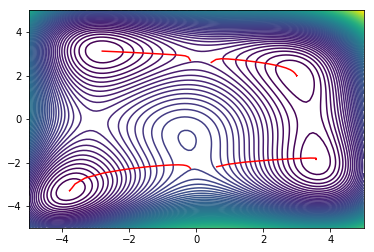

In [8]:
#plotting values
x_range = np.linspace(-5, 5, (int)(1/step))
y_range = np.linspace(-5, 5, (int)(1/step))
X, Y = np.meshgrid(x_range, y_range)
F = (X**2 + Y - 11)**2 + (X + Y**2 - 7)**2
plt.contour(X, Y, F, 99)
#plot gradient descent solution paths
plt.plot(w1[0,:], w1[1,:], color = 'r');
plt.plot(w2[0,:], w2[1,:], color = 'r');
plt.plot(w3[0,:], w3[1,:], color = 'r');
plt.plot(w4[0,:], w4[1,:], color = 'r');

In [7]:

u = [-1, 0, 4, 1, 0.5]
c = 2 * np.identity(5)

#N = 10^1
N = 10
y1 = []
for i in range(N):
    
    y1.append(multivariate_normal.rvs(u, c))
y1 = np.asarray(y1)
u1 = np.mean(y1, 0)
print(u1)
err1 = np.linalg.norm(u1-u)**2
print(err1)

[-1.2215938  -0.02808139  3.62776013  1.49246462  0.76955576]
0.5036366040691173


In [8]:
#N = 10^2
N = 10**2
y2 = []
for i in range(N):
    y2.append(multivariate_normal.rvs(u, c))
    
y2 = np.asarray(y2)
u2 = np.mean(y2, 0)
print(u2)
err2 = np.linalg.norm(u2-u)**2
print(err2)

[-1.21717498 -0.05950267  3.90057277  1.01780068  0.59382553]
0.06971140703838408


In [9]:
#N = 10^3
N = 10**3
y3 = []
for i in range(N):
    y3.append(multivariate_normal.rvs(u, c))
    
y3 = np.asarray(y3)
u3 = np.mean(y3, 0)
print(u3)
err3 = np.linalg.norm(u3-u)**2
print(err3)

[-1.03819333  0.03504162  3.87585427  0.99127186  0.48771383]
0.01832593917999225


In [11]:
#N = 10^4
N = 10**4
y4 = []
for i in range(N):
    y4.append(multivariate_normal.rvs(u, c))
    
y4 = np.asarray(y4)
u4 = np.mean(y4, 0)
print(u4)
err4 = np.linalg.norm(u4-u)**2
print(err4)

[-9.85516250e-01 -2.33241046e-03  3.98691636e+00  9.93640733e-01
  4.90908473e-01]
0.0005094968927919366


In [13]:
#N = 10^5
N = 10**5
y5 = []
for i in range(N):
    y5.append(multivariate_normal.rvs(u, c))
    
y5 = np.asarray(y5)
u5 = np.mean(y5, 0)
print(u5)
err5 = np.linalg.norm(u5-u)**2
print(err5)

[-1.00960667  0.00771636  4.00495914  1.00366702  0.50242245]
0.000195738746531382


In [4]:
#N = 10^6
N = 10**6
y6 = []
for i in range(N):
    y6.append(multivariate_normal.rvs(u, c))
    
y6 = np.asarray(y6)
u6 = np.mean(y6, 0)
print(u6)
err6 = np.linalg.norm(u6-u)**2
print(err6)

[-1.00014477e+00 -2.07635738e-03  4.00079035e+00  1.00258763e+00
  5.01493383e-01]
1.3882905791521893e-05


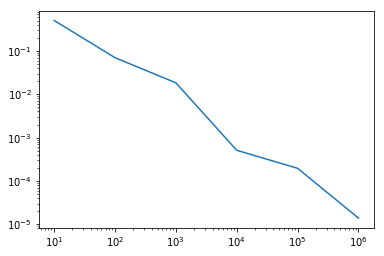

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot([10, 10**2, 10**3, 10**4, 10**5, 10**6], [err1, err2, err3, err4, err5, err6]);
ax.set_yscale('log')
ax.set_xscale('log')
#en and N seem to be (almost linearly) inversely proportional
